In [1]:
# Importing necessary libraries.
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np

In [85]:
# Importing the data
df=pd.read_csv('data (2).csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [86]:
print(df.shape)

(100000, 24)


In [87]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')


In [88]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [89]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [90]:
# Seperating continuous and categorical columns
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:              
        if df[column].nunique() < 50:      
                                                
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)        

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [91]:
# Defining a function for information of categorical column.
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")

# Univariate analysis

Unique values in TARGET are: [1 0]
Mode of TARGET is 0


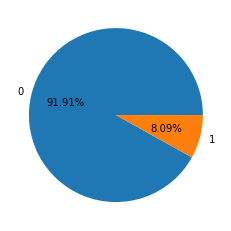

In [92]:
# For Target
info_of_cat('TARGET')
percentage = df["TARGET"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans


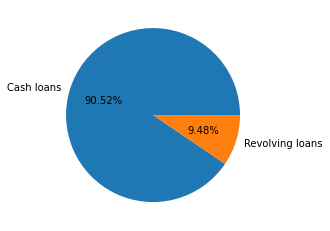

In [93]:
# For Name contract type
info_of_cat('NAME_CONTRACT_TYPE')
percentage = df["NAME_CONTRACT_TYPE"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F


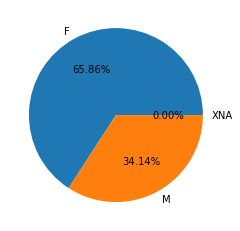

In [94]:
# For Gender
info_of_cat('GENDER')
percentage = df["GENDER"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in Car are: ['N' 'Y']
Mode of Car is N


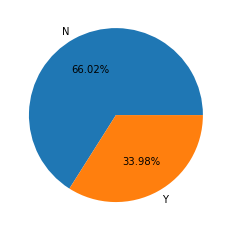

In [95]:
# For Car
info_of_cat('Car')
percentage = df["Car"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in House are: ['Y' 'N']
Mode of House is Y


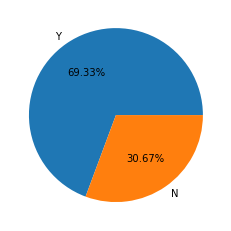

In [96]:
# For Houses
info_of_cat('House')
percentage = df["House"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is 0


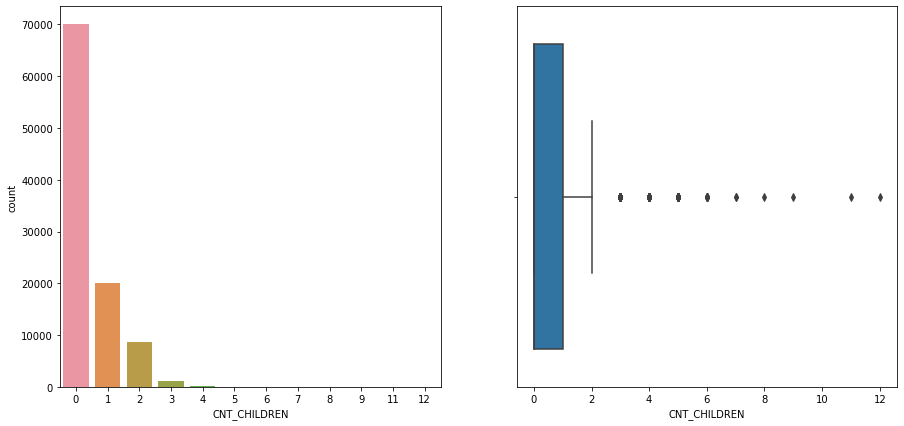

In [97]:
# For Children Count
info_of_cat('CNT_CHILDREN')
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

sns.countplot(x = df["CNT_CHILDREN"], ax = ax[0])
sns.boxplot(x= df["CNT_CHILDREN"], ax = ax[1]) 
plt.show()

As we can see there are some outliers in the children count column. Here we will drop the rows with more than 4 children.

In [128]:
# Doing outlier treatment for chilren count
idx=df[df.CNT_CHILDREN>4].index
df=df.drop(labels= idx, axis=0)

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied


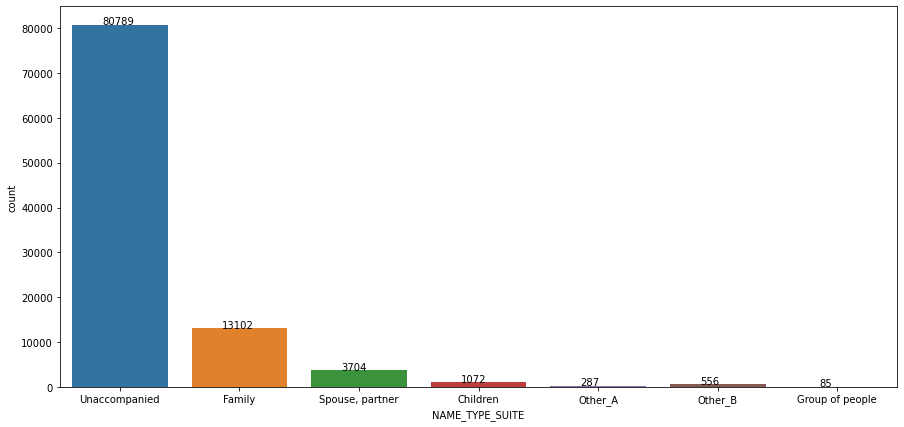

In [98]:
# For Name Type Suite
info_of_cat('NAME_TYPE_SUITE')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "NAME_TYPE_SUITE", data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+10))
plt.show()

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working


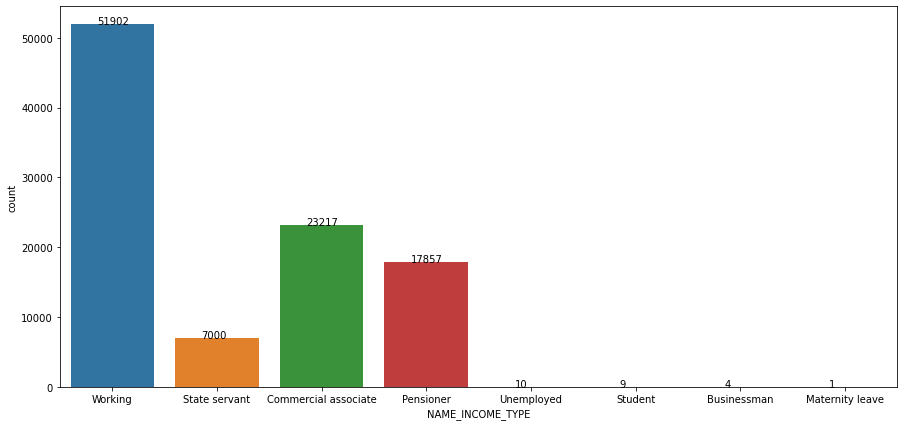

In [99]:
# For Name Income Type
info_of_cat('NAME_INCOME_TYPE')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "NAME_INCOME_TYPE", data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+10))
plt.show()

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special


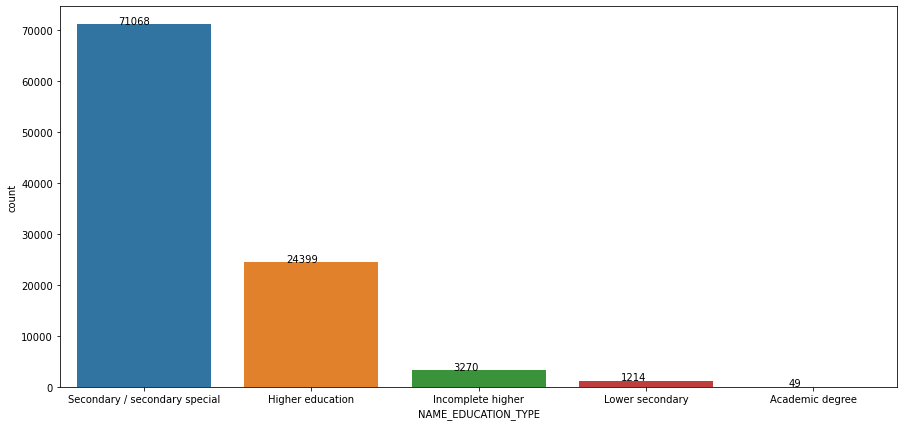

In [100]:
# For Name Education Type
info_of_cat('NAME_EDUCATION_TYPE')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "NAME_EDUCATION_TYPE", data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+10))
plt.show()

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is Married


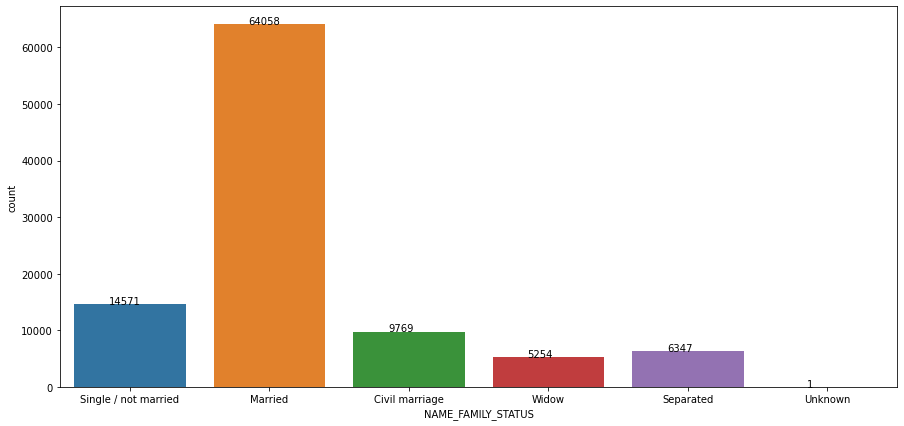

In [101]:
# For Name Family Type
info_of_cat('NAME_FAMILY_STATUS')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "NAME_FAMILY_STATUS", data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+10))
plt.show()

Unique values in MOBILE are: [1 0]
Mode of MOBILE is 1


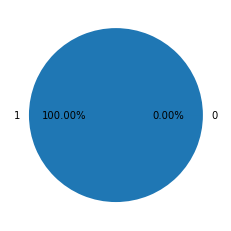

In [102]:
# For Mobile
info_of_cat('MOBILE')
percentage = df["MOBILE"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in WORK_PHONE are: [1 0]
Mode of WORK_PHONE is 1


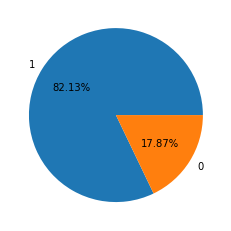

In [103]:
# For Work Phone
info_of_cat('WORK_PHONE')
percentage = df["WORK_PHONE"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in HOME_PHONE are: [0 1]
Mode of HOME_PHONE is 0


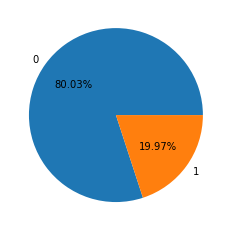

In [104]:
# For Home Phone
info_of_cat('HOME_PHONE')
percentage = df["HOME_PHONE"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in MOBILE_REACHABLE are: [1 0]
Mode of MOBILE_REACHABLE is 1


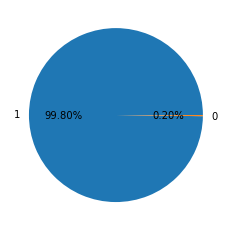

In [105]:
# For Mobile Reachable
info_of_cat('MOBILE_REACHABLE')
percentage = df["MOBILE_REACHABLE"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is 0


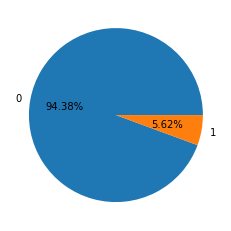

In [106]:
# For Flag Email
info_of_cat('FLAG_EMAIL')
percentage = df["FLAG_EMAIL"].value_counts()        
labels = list(percentage.index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers


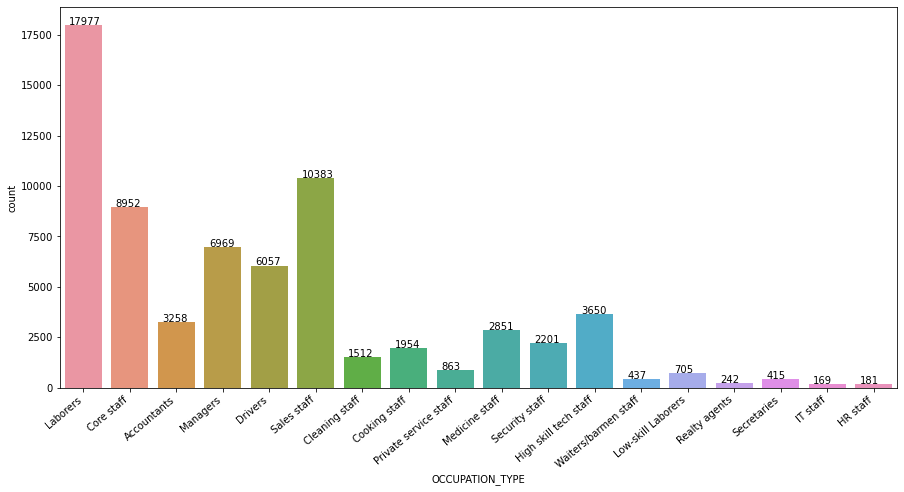

In [107]:
# For Occupation Type
info_of_cat('OCCUPATION_TYPE')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "OCCUPATION_TYPE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+10))
plt.show()

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is 2.0


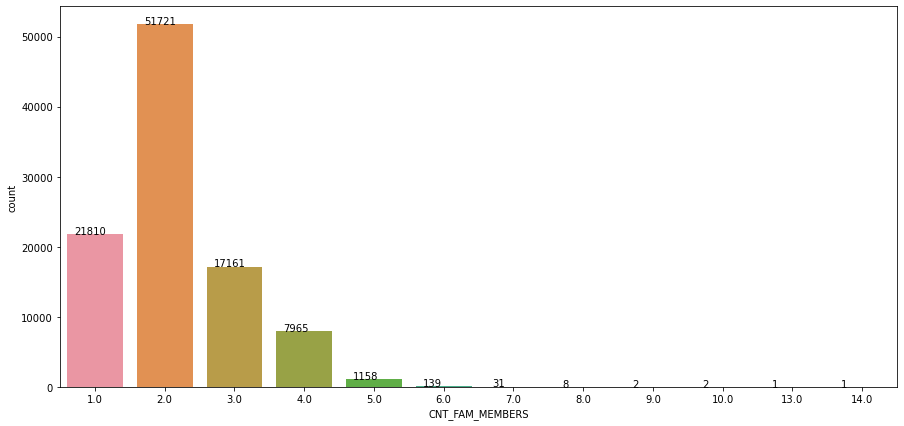

In [108]:
# For Count of Family Members
info_of_cat('CNT_FAM_MEMBERS')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "CNT_FAM_MEMBERS", data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+10))
plt.show()

In [126]:
# Removing null values
df= df.dropna(subset=['CNT_FAM_MEMBERS'])

As we can see there are some outliers in the family members column. Here we will drop the rows with more than 6 family members.

In [127]:
# Doing outlier treatment for Family Members
idx=df[df.CNT_FAM_MEMBERS>6].index
df=df.drop(labels= idx, axis=0)

Unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Mode of APPLICATION_DAY is TUESDAY


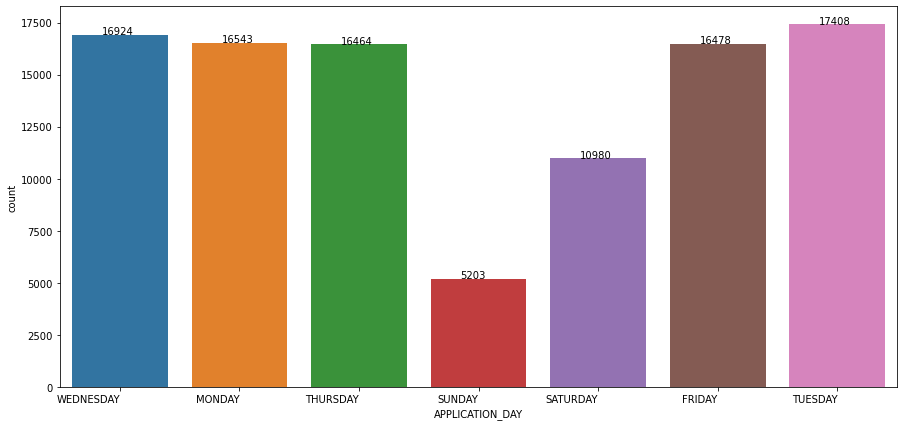

In [109]:
# For Application Day
info_of_cat('APPLICATION_DAY')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "APPLICATION_DAY", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0 , ha = "right")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+10))
plt.show()

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode of TOTAL_DOC_SUBMITTED is 1


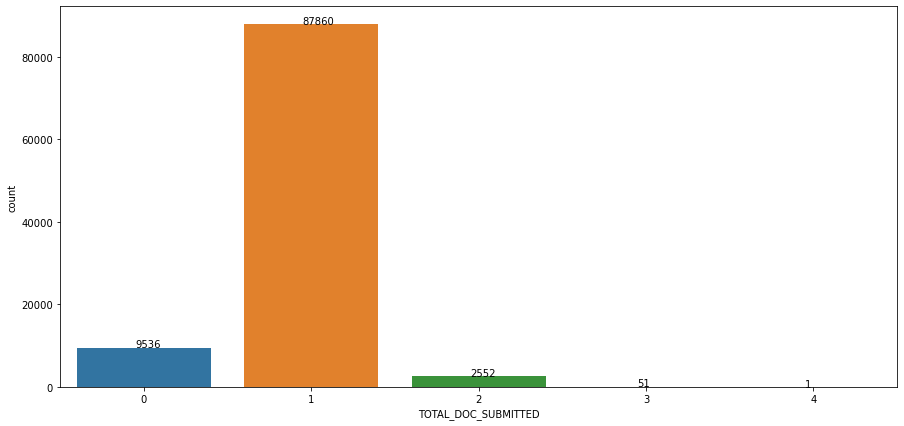

In [110]:
# For Total Documents submitted
info_of_cat('TOTAL_DOC_SUBMITTED')
plt.figure( figsize = (15, 7))
ax= sns.countplot(x = "TOTAL_DOC_SUBMITTED", data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.35,p.get_height()+10))
plt.show()

In [111]:
# Defining a function for information of continuous columns
def info_of_num(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"The minimum of the {col} is {df[col].min()}")
    print(f"The maximum of the {col} is {df[col].max()}")

In [112]:
# For Total Income Amount
info_of_num('AMT_INCOME_TOTAL')

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896
The minimum of the AMT_INCOME_TOTAL is 25650.0
The maximum of the AMT_INCOME_TOTAL is 117000000.0


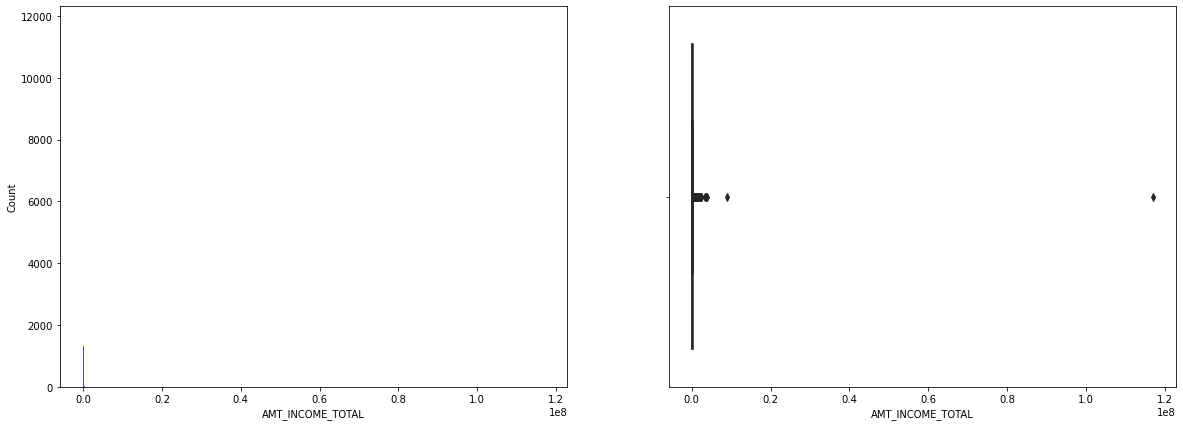

In [113]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[1], color = "green") 
plt.show()

In [114]:
# Defining function to remove outliers
def myoutliers(df, col):
    Q3=np.quantile(df[col], 0.75)
    Q1=np.quantile(df[col], 0.25)
    IQR= Q3-Q1
    
    global mylist
    global ind
    
    lower_range = Q1- 1.5*IQR
    upper_range = Q3+ 1.5*IQR
    
    print("The lower limit of ",col,"is ",lower_range)
    print("The upper limit of ",col,"is ",upper_range)
    
    ind=df[(df[col]<lower_range)|(df[col]>upper_range)].index
    mylist= [x for x in df[col] if ((x < lower_range)|(x > upper_range))]
    print('Total outliers in ',col,'are',len(mylist))

In [115]:
# doing outlier treatment for Total Income Amount
myoutliers(df, 'AMT_INCOME_TOTAL')
df=df.drop(labels= ind, axis=0)

The lower limit of  AMT_INCOME_TOTAL is  -22500.0
The upper limit of  AMT_INCOME_TOTAL is  337500.0
Total outliers in  AMT_INCOME_TOTAL are 4571


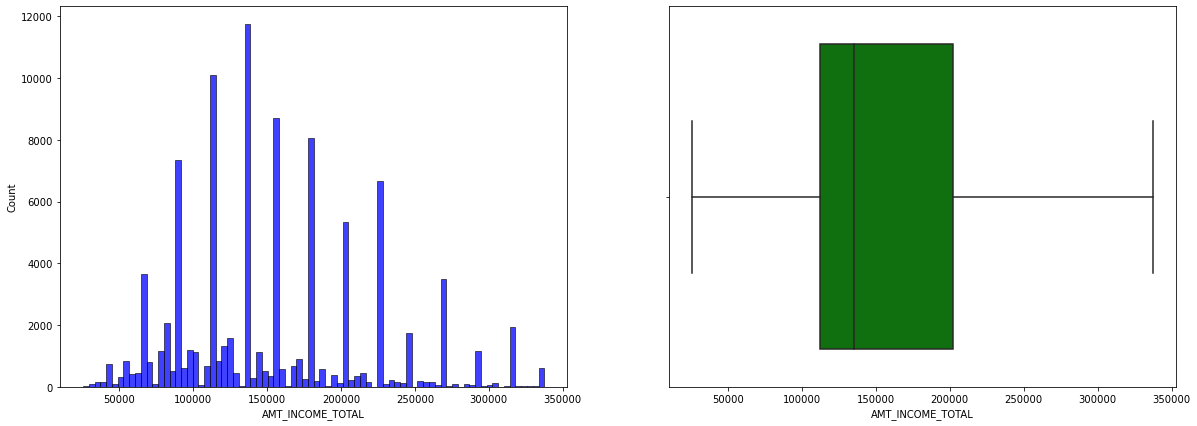

In [116]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[1], color = "green") 
plt.show()

In [117]:
# For Amount Credit
info_of_num('AMT_CREDIT')

The mean of the AMT_CREDIT is 579922.2641597418
The median of the AMT_CREDIT is 499500.0
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 384736.47803875594
The minimum of the AMT_CREDIT is 45000.0
The maximum of the AMT_CREDIT is 3150000.0


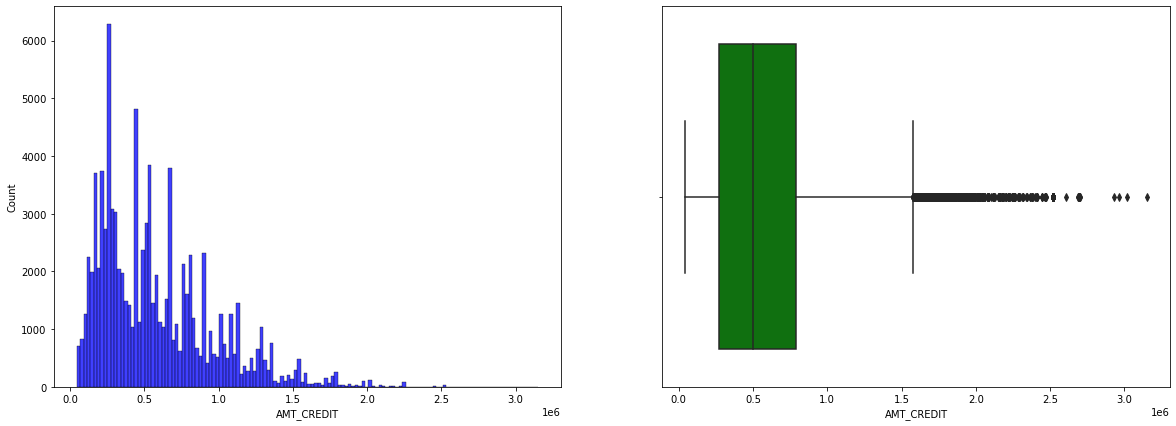

In [118]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_CREDIT"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[1], color = "green") 
plt.show()

In [119]:
# doing outlier treatment for Credit Amount
myoutliers(df, 'AMT_CREDIT')
df=df.drop(labels= ind, axis=0)

The lower limit of  AMT_CREDIT is  -513000.0
The upper limit of  AMT_CREDIT is  1575000.0
Total outliers in  AMT_CREDIT are 1646


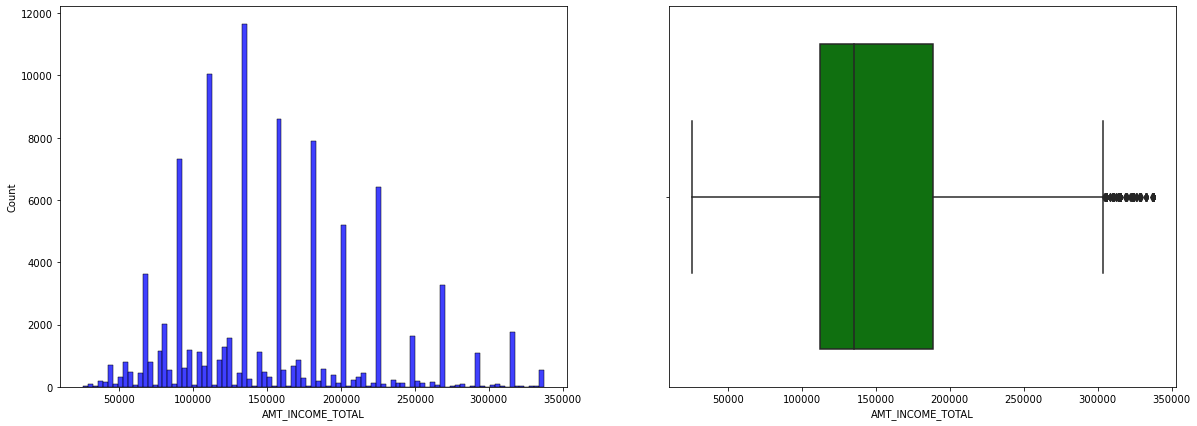

In [120]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[1], color = "green") 
plt.show()

In [121]:
# For Goods Price Amount
info_of_num('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 499191.1142640656
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 225000.0
The standard deviation of the AMT_GOODS_PRICE is 315295.26935554977
The minimum of the AMT_GOODS_PRICE is 45000.0
The maximum of the AMT_GOODS_PRICE is 1575000.0


In [122]:
# Removing null values
df= df.dropna(subset=['AMT_GOODS_PRICE'])

In [124]:
# doing outlier treatment for Credit Amount
myoutliers(df, 'AMT_GOODS_PRICE')
df=df.drop(labels= ind, axis=0)

The lower limit of  AMT_GOODS_PRICE is  -438750.0
The upper limit of  AMT_GOODS_PRICE is  1343250.0
Total outliers in  AMT_GOODS_PRICE are 2201


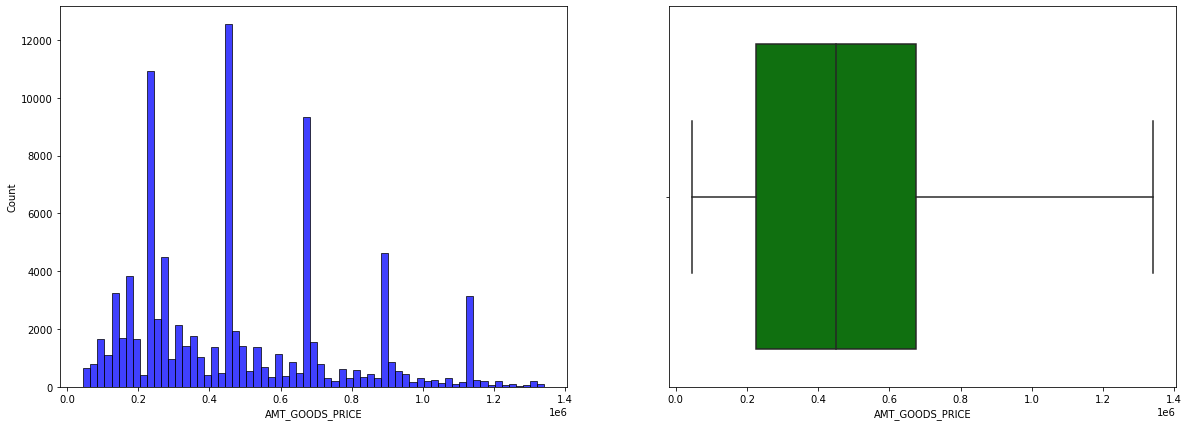

In [125]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[1], color = "green") 
plt.show()

In [130]:
print('After doing the outlier treatment and null value treatment for all the necessary columns we are remaining with',df.shape[0],'rows.')

After doing the outlier treatment and null value treatment for all the necessary columns we are remaining with 91462 rows.


# Bivariate analysis

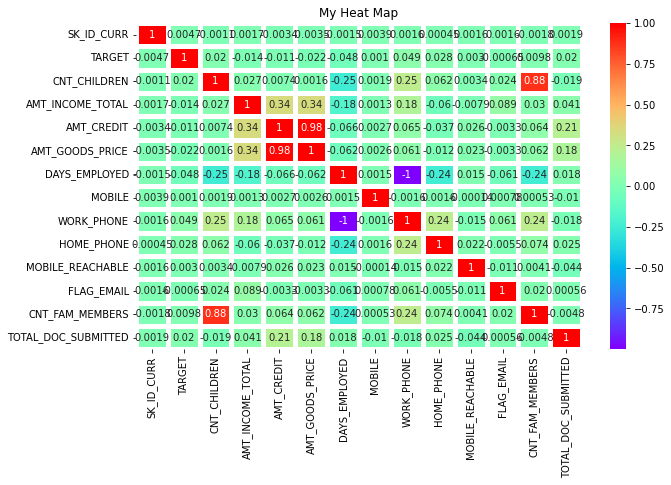

In [133]:
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

From this heatmap we can se that there is a direct correlation between (Credit amount and Goods price amount) and (Children count and Family member count)

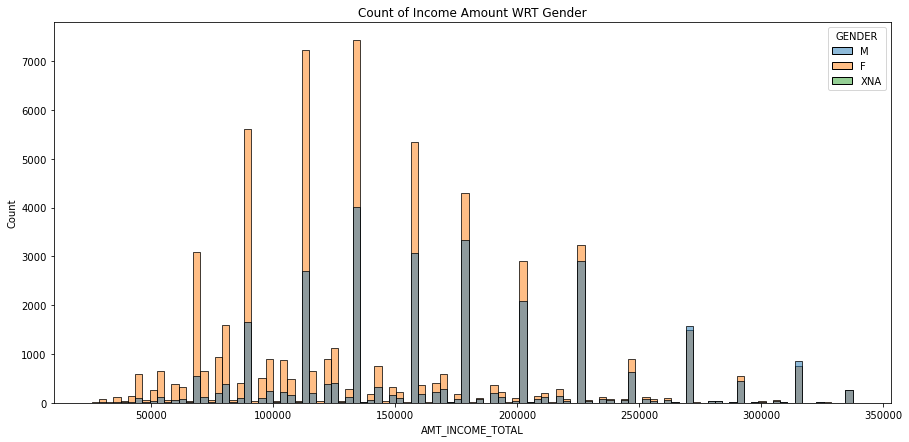

In [198]:
# Analysis of income on the basis of gender
fig, ax = plt.subplots(figsize = (15, 7))
sns.histplot(x = df["AMT_INCOME_TOTAL"], hue = df["GENDER"])
plt.title('Count of Income Amount WRT Gender')
plt.show()

Here we can see that for the income categories lower than 250000 there are more female applicants but for income categories more than 250000 the number male applicants is more than that of female applicants.

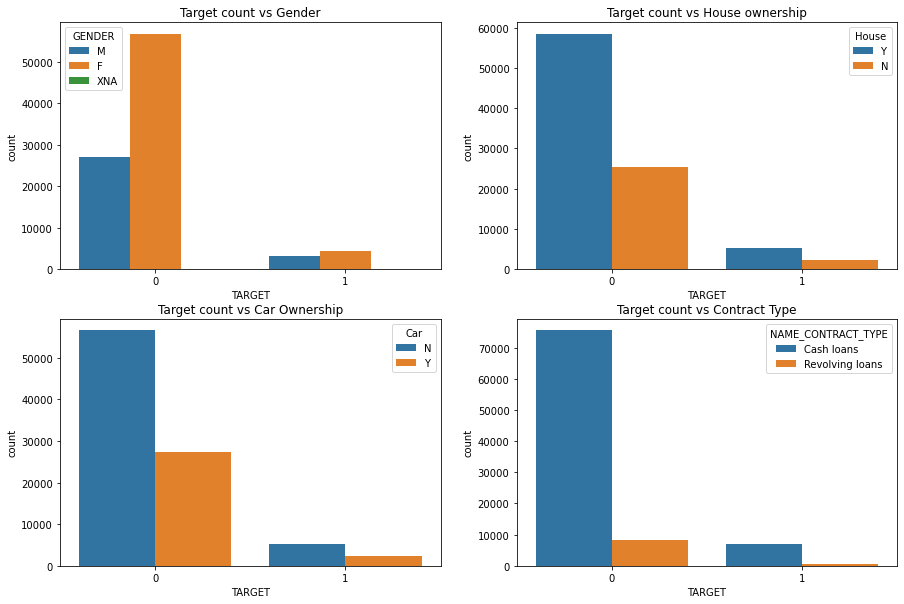

In [139]:
# Analysis of Target with respect to gender, house, car, contract type
fig, ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='TARGET', hue='GENDER', data=df, ax=ax[0,0])
ax[0,0].set_title('Target count vs Gender')
sns.countplot(x='TARGET', hue='House', data=df, ax=ax[0,1])
ax[0,1].set_title('Target count vs House ownership')
sns.countplot(x='TARGET', hue='Car', data=df, ax=ax[1,0])
ax[1,0].set_title('Target count vs Car Ownership')
sns.countplot(x='TARGET', hue='NAME_CONTRACT_TYPE', data=df, ax=ax[1,1])
ax[1,1].set_title('Target count vs Contract Type')
plt.show()
plt.close()

### From the above dashboard we can make the following interpretations:
1. The proportion of male applicants in defaulters is more than that of the female applicants.
2. Around 2/3rd of the defaulted applicants own a house.
3. Around 2/3rd of the defaulted applicants don't own a car.
4. The applicants who have defaulted consist majority of cash loan applicants.

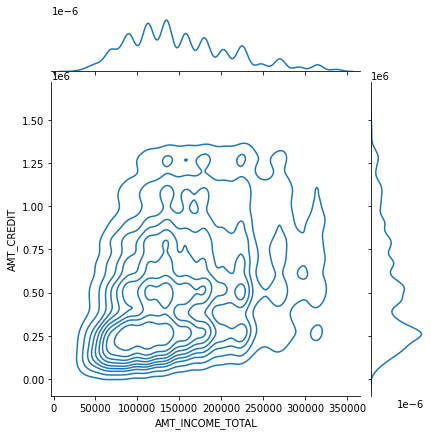

In [200]:
# Analysis of Total Income Amount a with respect to Credit Amount
sns.jointplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT', data=df, kind='kde', palette='Blues')
plt.show()

Here we can see the applicants are densely populated in the income amount range of 70000-120000 and the credit range of 120000-300000

## To determine which applicants should be shortlisted to approve their loan we will create a new attribute called Risk Analysis Score (RAS).

### The below factors will affect the RAS positively:
#### Major Factors
1. Income Amount
2. House Ownership
3. Car Ownership

#### Minor Factors
1. Mobile
2. Work Phone
3. Home Phone
4. Email
5. Documents Submitted

### The below factors will affect the RAS negatively:
1. Target Score
2. Count of children/ count of family members*
3. Credit Amount/ Goods price amount*
  * These attributes show direct correlation, therefore we would consider any one of them.

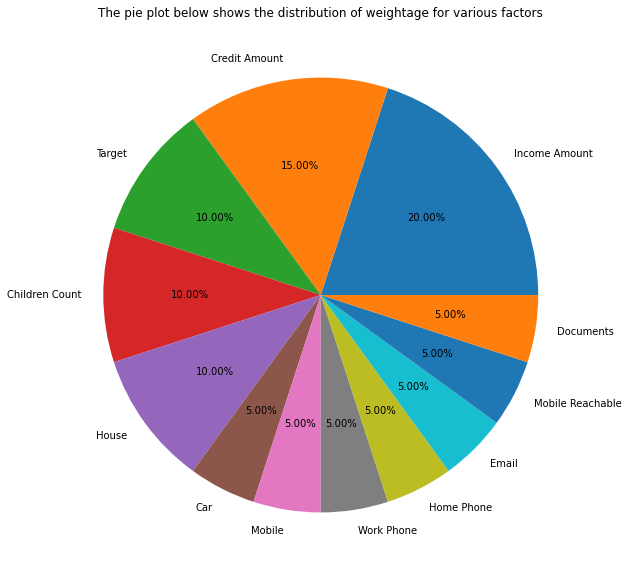

In [156]:
# Weightage distribution for various factors in RAS
labels=['Income Amount','Credit Amount','Target','Children Count','House','Car','Mobile','Work Phone','Home Phone','Email','Mobile Reachable','Documents']
percentage=[20,15,10,10,10,5,5,5,5,5,5,5]
fig, ax = plt.subplots(figsize = (10, 10))
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.title('The pie plot below shows the distribution of weightage for various factors')
plt.show()

# Deriving the formula

In [182]:
df_h=df.House.map(dict(Y=10, N=0))
df_c=df.Car.map(dict(Y=5, N=0))
df_m=df['MOBILE']*5
df_wp=df['WORK_PHONE']*5
df_hp=df['HOME_PHONE']*5
df_mr=df['MOBILE_REACHABLE']*5
df_e=df['FLAG_EMAIL']*5
df_d=df['TOTAL_DOC_SUBMITTED']+1
df_t=(1-df['TARGET'])*10
df_cc=(5-df['CNT_CHILDREN'])*2

In [183]:
df_i=df1['AMT_INCOME_TOTAL']/337500*20
df_i=df_i.round(0).astype(int)
df_ac=(1343250-df1['AMT_CREDIT'])/1298250*15
df_ac=df_ac.round(0).astype(int)

In [184]:
RAS=df_h+df_c+df_m+df_wp+df_hp+df_mr+df_e+df_d+df_t+df_cc+df_i+df_ac

In [189]:
df=df.assign(RAS=RAS)

In [190]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,RAS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1,60
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1,1,0,1,0,Core staff,2.0,MONDAY,1,54
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,1,1,1,1,0,Laborers,1.0,MONDAY,0,74
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1,67
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,1,1,0,1,0,Core staff,1.0,THURSDAY,1,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,1,1,1,1,0,Sales staff,3.0,MONDAY,1,66
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,1,1,0,1,0,Managers,3.0,TUESDAY,1,70
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,1,1,0,1,0,Sales staff,2.0,TUESDAY,1,61
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,1,1,0,1,0,Sales staff,2.0,FRIDAY,2,64


In [191]:
info_of_num('RAS')

The mean of the RAS is 62.46434584854912
The median of the RAS is 63.0
The mode of the RAS is 64
The standard deviation of the RAS is 8.160445955122029
The minimum of the RAS is 28
The maximum of the RAS is 93


Now we can filter the applicants on the basis of this Risk Analysis Score. The greater the threshold the lesser the applicant get approved. 

In our case, we will take our median value i.e. 63 as our threshold value and filter according to that.


In [193]:
df1=df[df.RAS>=63]

In [194]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,RAS
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,1,1,1,1,0,Laborers,1.0,MONDAY,0,74
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1,67
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,1,1,0,1,0,Core staff,1.0,THURSDAY,1,64
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1,68
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,405000.0,...,1,1,0,1,0,Laborers,1.0,THURSDAY,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,1,1,0,1,0,Laborers,2.0,SATURDAY,1,63
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,1,1,1,1,0,Sales staff,3.0,MONDAY,1,66
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,1,1,0,1,0,Managers,3.0,TUESDAY,1,70
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,1,1,0,1,0,Sales staff,2.0,FRIDAY,2,64


In [197]:
datatoexcel=pd.ExcelWriter('ApprovedLoans.xlsx')
df1.to_excel(datatoexcel)
datatoexcel.save()